In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.1)


In [10]:
# Cargar los archivos CSV

df1 = pd.read_csv("C:/Users/Usuario/Desktop/MIO/CURSO/PROYECTO FINAL/DATA/CRUDO/winemag-data_first150k.csv")
df2 = pd.read_csv("C:/Users/Usuario/Desktop/MIO/CURSO/PROYECTO FINAL/DATA/CRUDO/winemag-data-130k-v2.csv")


# Añadir columnas faltantes a df1 para igualar estructura
missing_cols_df1 = set(df2.columns) - set(df1.columns)
for col in missing_cols_df1:
    df1[col] = pd.NA

# Reordenar columnas de df1 para igualarlas con df2
df1 = df1[df2.columns]

# Unir los datasets
df_final = pd.concat([df1, df2], ignore_index=True)

# Eliminar duplicados
df_final.drop_duplicates(inplace=True)

# Limpieza profunda:

# 1. Eliminar filas con nulos en columnas esenciales
df_final.dropna(subset=["country", "province", "variety"], inplace=True)

# 2. Imputar la mediana en 'price'
median_price = df_final["price"].median()
df_final["price"].fillna(median_price, inplace=True)

# 3. Eliminar columnas con muchos nulos y bajo valor analítico
df_final.drop(columns=["taster_name", "taster_twitter_handle", "region_2"], inplace=True)

# 4. Verificación final
print("Forma final del dataset limpio:", df_final.shape)
print("Valores nulos restantes:\n", df_final.isnull().sum())

# 5. Exportar dataset limpio
df_final.to_csv("C:/Users/Usuario/Desktop/MIO/CURSO/PROYECTO FINAL/DATA/PROCESADO/final_dataset.csv", index=False)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9068\1128548044.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final["price"].fillna(median_price, inplace=True)


Forma final del dataset limpio: (280832, 11)
Valores nulos restantes:
 Unnamed: 0          0
country             0
description         0
designation     83188
points              0
price               0
province            0
region_1        46238
title          150925
variety             0
winery              0
dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12748\542802833.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Usuario/Desktop/MIO/CURSO/PROYECTO FINAL/DATA/PROCESADO/final_dataset.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280832 entries, 0 to 280831
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   280832 non-null  int64  
 1   country      280832 non-null  object 
 2   description  280832 non-null  object 
 3   designation  197644 non-null  object 
 4   points       280832 non-null  int64  
 5   price        280832 non-null  float64
 6   province     280832 non-null  object 
 7   region_1     234594 non-null  object 
 8   title        129907 non-null  object 
 9   variety      280832 non-null  object 
 10  winery       280832 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 23.6+ MB
None
           Unnamed: 0 country  \
count   280832.000000  280832   
unique            NaN      50   
top               NaN      US   
freq              NaN  116901   
mean     70616.777080     NaN   
std      41214.554861     NaN   
min          0.000000     NaN  

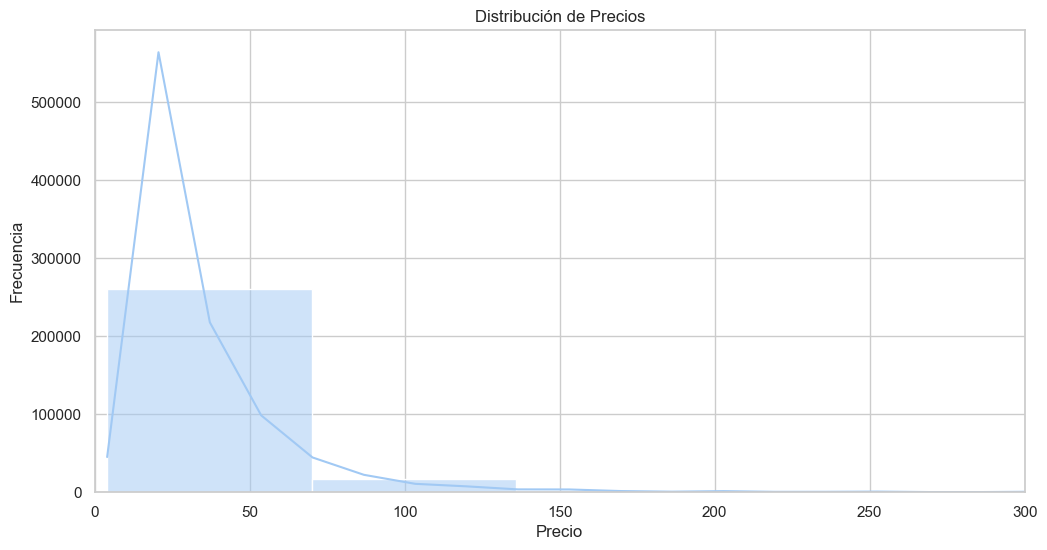


Correlación entre precio y puntos: 0.415


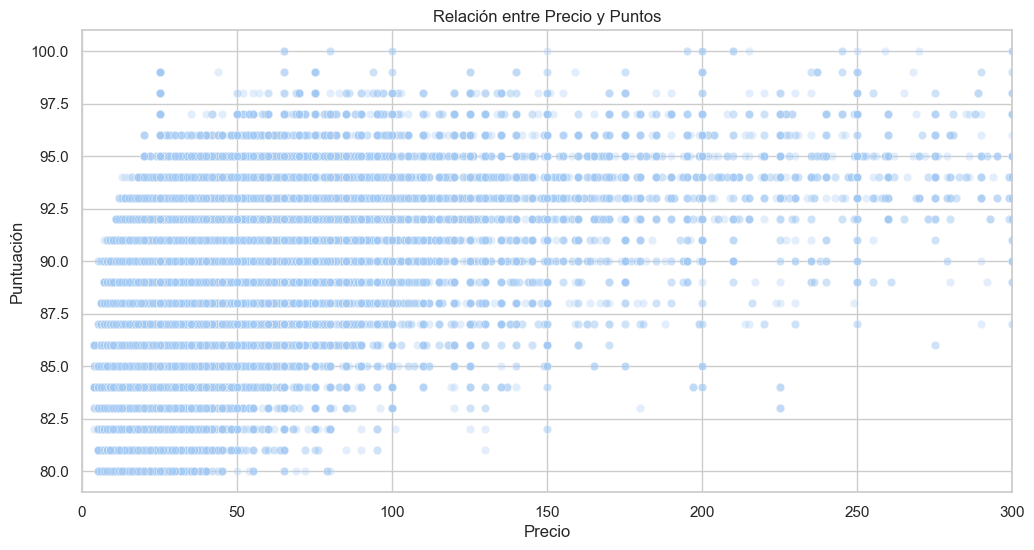

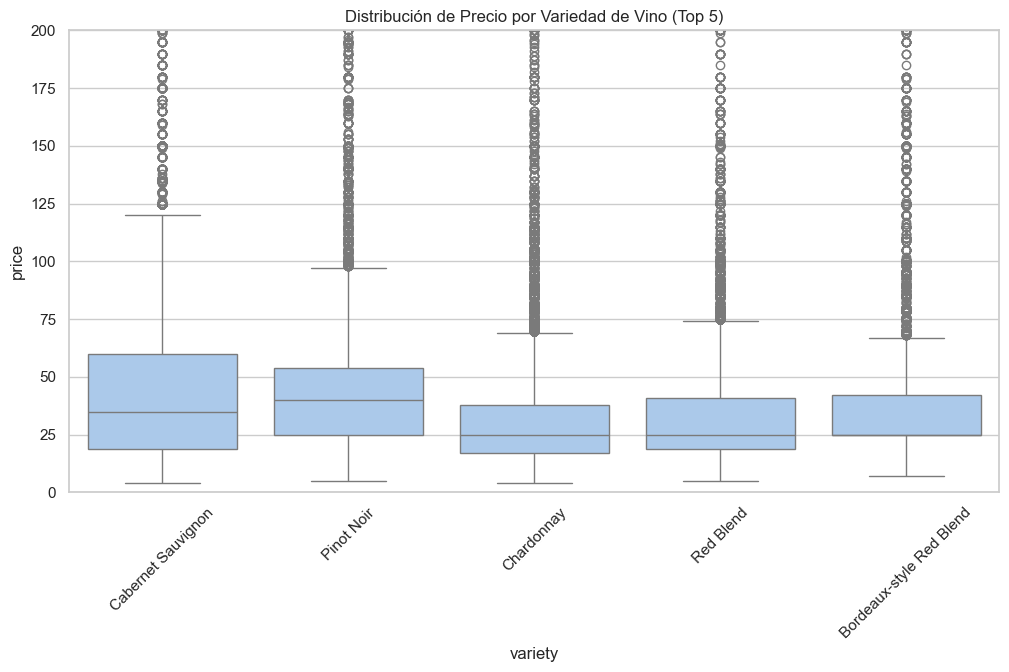

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética de gráficos
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargar el dataset limpio
df = pd.read_csv("C:/Users/Usuario/Desktop/MIO/CURSO/PROYECTO FINAL/DATA/PROCESADO/final_dataset.csv")

# ------------------------------
# ANÁLISIS DESCRIPTIVO
# ------------------------------

# Vista general
print(df.info())
print(df.describe(include="all"))

# Top 10 países con más vinos
top_countries = df["country"].value_counts().head(10)
print("\nTop 10 países con más registros:\n", top_countries)

# Promedio de puntuación por país
mean_points_country = df.groupby("country")["points"].mean().sort_values(ascending=False)
print("\nPuntuación media por país:\n", mean_points_country)

# Distribución de precios
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.xlim(0, 300)  # límite visual para evitar outliers extremos
plt.show()

# ------------------------------
# ANÁLISIS ESTADÍSTICO
# ------------------------------

# Correlación entre precio y puntuación
corr = df["price"].corr(df["points"])
print(f"\nCorrelación entre precio y puntos: {corr:.3f}")

sns.scatterplot(data=df, x="price", y="points", alpha=0.3)
plt.title("Relación entre Precio y Puntos")
plt.xlabel("Precio")
plt.ylabel("Puntuación")
plt.xlim(0, 300)
plt.show()

# Boxplot de precios por variedad (Top 5)
top_varieties = df["variety"].value_counts().head(5).index
sns.boxplot(data=df[df["variety"].isin(top_varieties)], x="variety", y="price")
plt.title("Distribución de Precio por Variedad de Vino (Top 5)")
plt.xticks(rotation=45)
plt.ylim(0, 200)
plt.show()

# ------------------------------
# EXPORTAR INSIGHTS SI LO DESEAS
# ------------------------------

# Guardar estadísticas por país en CSV
df.groupby("country")[["points", "price"]].mean().to_csv("C:/Users/Usuario/Desktop/MIO/CURSO/PROYECTO FINAL/DATA/PROCESADO/stats_by_country.csv")


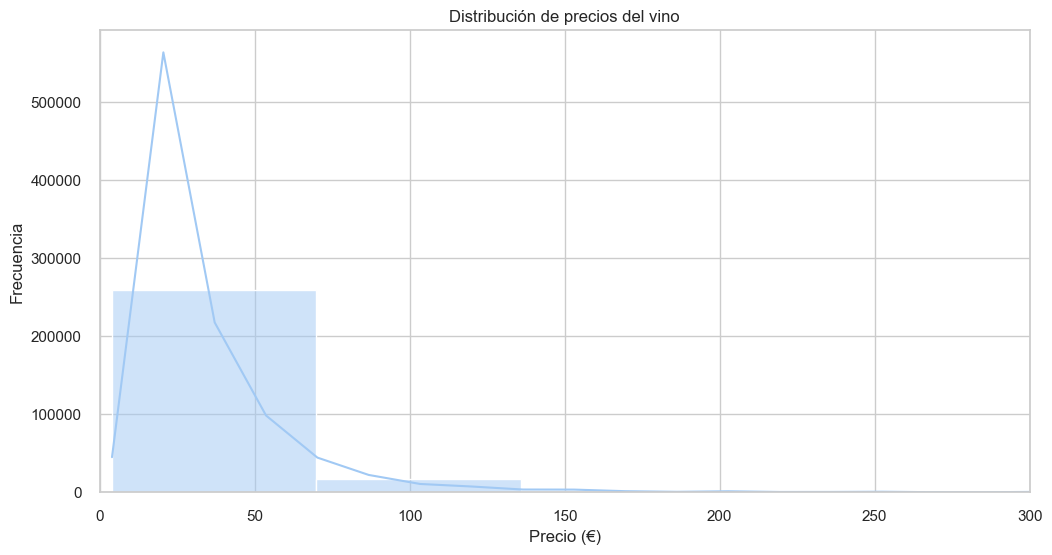

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ejemplo: histograma de precios
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribución de precios del vino")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")
plt.xlim(0, 300)
plt.show()
